In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

# Load the dataset 
iris_df = sns.load_dataset("iris") 

# Display the first few rows of the dataset
iris_df.head()

# Display statistics of the dataset
iris_df.describe()



,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
import pandas as pd
import numpy as np
from sklearn import datasets

# Load the Iris dataset
iris = datasets.load_iris()

# Convert the dataset into a pandas DataFrame for easy exploration
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(df.head())

# Central Tendency Metrics
mean_values = df.mean()
median_values = df.median()
mode_values = df.mode().iloc[0]  # Pandas mode() can return multiple modes, selecting the first

# Dispersion Metrics
variance_values = df.var()
std_dev_values = df.std()
range_values = df.max() - df.min()
iqr_values = df.quantile(0.75) - df.quantile(0.25)

# Display Central Tendency Metrics
print("\nCentral Tendency Metrics:")
print(f"Mean:\n{mean_values}\n")
print(f"Median:\n{median_values}\n")
print(f"Mode:\n{mode_values}\n")

# Display Dispersion Metrics
print("\nDispersion Metrics:")
print(f"Variance:\n{variance_values}\n")
print(f"Standard Deviation:\n{std_dev_values}\n")
print(f"Range:\n{range_values}\n")
print(f"Interquartile Range (IQR):\n{iqr_values}\n")


First few rows of the dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

Central Tendency Metrics:
Mean:
sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64

Median:
sepal length (cm)    5.80
sepal width (cm)     3.00
petal length (cm)    4.35
petal width (cm)     1.30
dtype: float64

Mode:
sepal length (cm)    5.0
sepal width (cm)     3.0
petal length (cm)    1.4
petal width (cm)     0.2
Name: 0, dtype: float64


Dispersion Metrics:
Variance:
sepal length (cm)    0.685694
sepal width (cm)     0.1

In [8]:
# Checking for missing values
missing_values = df.isnull().sum()
print("Missing Values in each column:")
print(missing_values)


Missing Values in each column:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64


In [3]:
import pandas as pd
import numpy as np
from sklearn import datasets

# Load Iris dataset
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# Hypothetical missing values (simulate missing data)
df.iloc[5:10, 1] = np.nan  # introduce missing values in 'sepal width (cm)'

# Handling Missing Values
print("Missing Values:\n", df.isnull().sum())  # Identify missing values
df_filled = df.fillna(df.mean())  # Fill missing values with column mean

# Detecting Outliers using IQR
Q1 = df_filled.quantile(0.25)
Q3 = df_filled.quantile(0.75)
IQR = Q3 - Q1

outliers = (df_filled < (Q1 - 1.5 * IQR)) | (df_filled > (Q3 + 1.5 * IQR))
print("Outliers Detected:\n", outliers)

# Remove outliers 
df_no_outliers = df_filled[~outliers.any(axis=1)]

# Handling Inconsistencies (e.g., negative values)
df_no_inconsistencies = df_no_outliers[df_no_outliers >= 0]

# Cleaned Data
print("Cleaned Data:\n", df_no_inconsistencies.head())


Missing Values:
 sepal length (cm)    0
sepal width (cm)     5
petal length (cm)    0
petal width (cm)     0
dtype: int64
Outliers Detected:
      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                False             False              False             False
1                False             False              False             False
2                False             False              False             False
3                False             False              False             False
4                False             False              False             False
..                 ...               ...                ...               ...
145              False             False              False             False
146              False             False              False             False
147              False             False              False             False
148              False             False              False             False


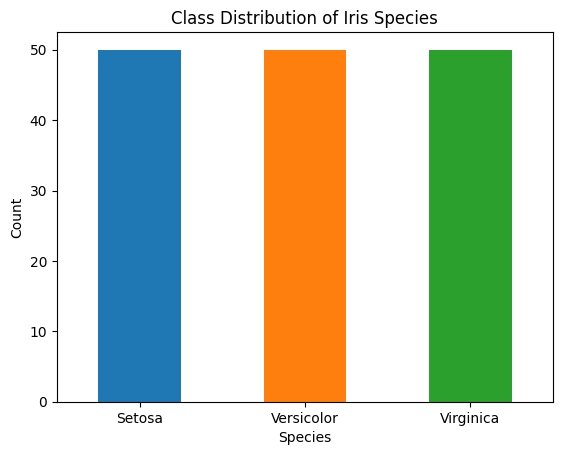

In [9]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris

# Load the dataset and convert it to a DataFrame
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target

# Map target to species names for readability
df['species'] = df['species'].map({0: 'Setosa', 1: 'Versicolor', 2: 'Virginica'})

# Plot class distribution
species_counts = df['species'].value_counts()
species_counts.plot(kind='bar', color=['#1f77b4', '#ff7f0e', '#2ca02c'])
plt.title('Class Distribution of Iris Species')
plt.xlabel('Species')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import pandas as pd

# Load the Iris dataset
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target

# Map target names to species
df['species'] = df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

# Now, calculate the mean for each species
mean_values = df.groupby('species').mean()

# Bar chart
mean_values.plot(kind='bar', figsize=(10,6))
plt.title("Mean of Iris Features by Species")
plt.ylabel("Mean value")
plt.show()


In [ ]:
# Histograms for each feature
plt.figure(figsize=(10, 8))
for i, feature in enumerate(iris.feature_names):
    plt.subplot(2, 2, i + 1)
    plt.hist(iris.data[:, i], bins=20, color='g', alpha=0.7)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()


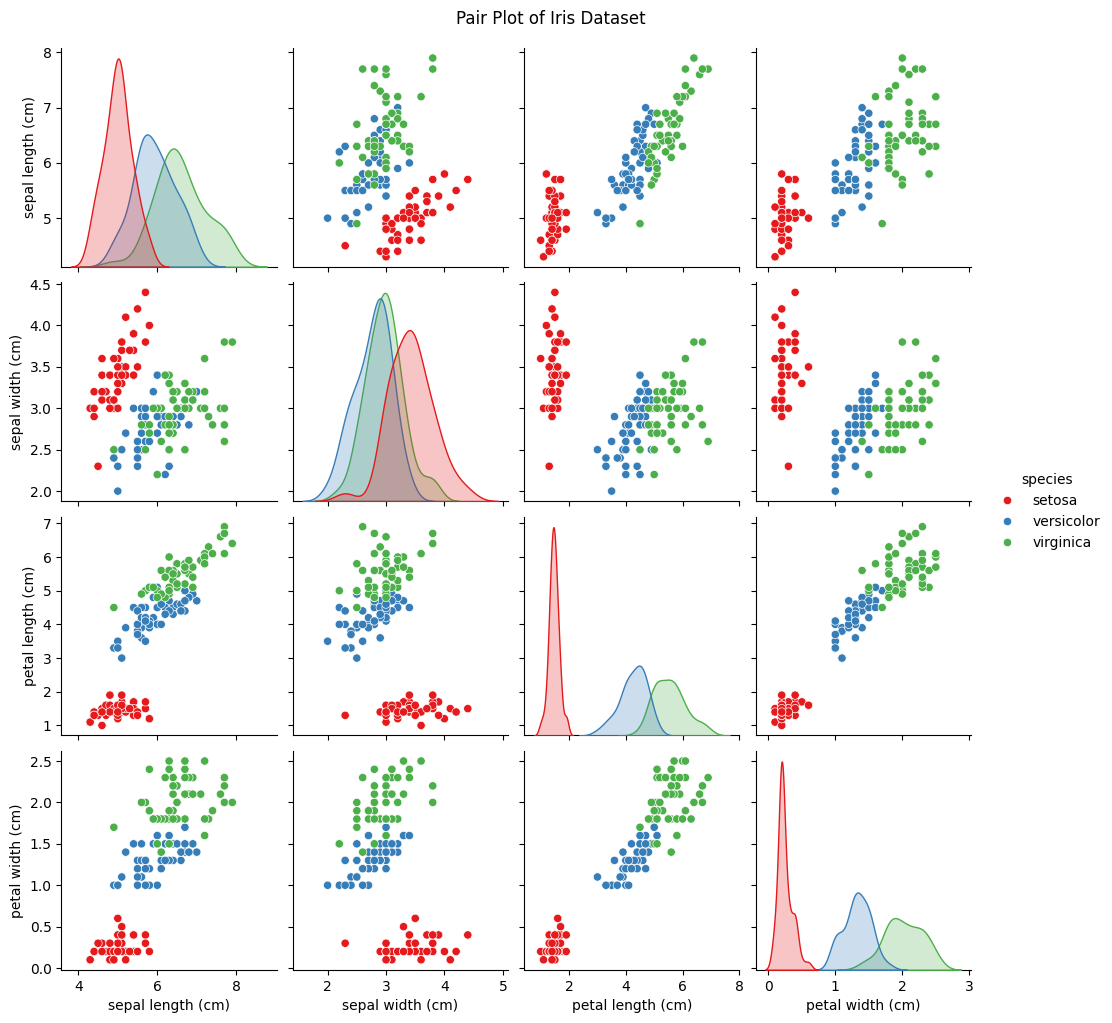

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets

# Load Iris dataset and create a DataFrame
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

# Create a pair plot with seaborn
sns.pairplot(df, hue="species", diag_kind="kde", palette="Set1")
plt.suptitle("Pair Plot of Iris Dataset", y=1.02)
plt.show()


In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets

# Load Iris dataset and create a DataFrame
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

# Scatter plot
plt.figure(figsize=(8,6))
sns.scatterplot(x=iris_df['sepal length (cm)'], y=iris_df['petal length (cm)'], hue=iris_df['species'], palette="Set1")
plt.title('Scatter Plot: Sepal Length vs Petal Length')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Length (cm)')
plt.legend(title="Species")
plt.show()


NameError: name 'iris_df' is not defined

<Figure size 800x600 with 0 Axes>

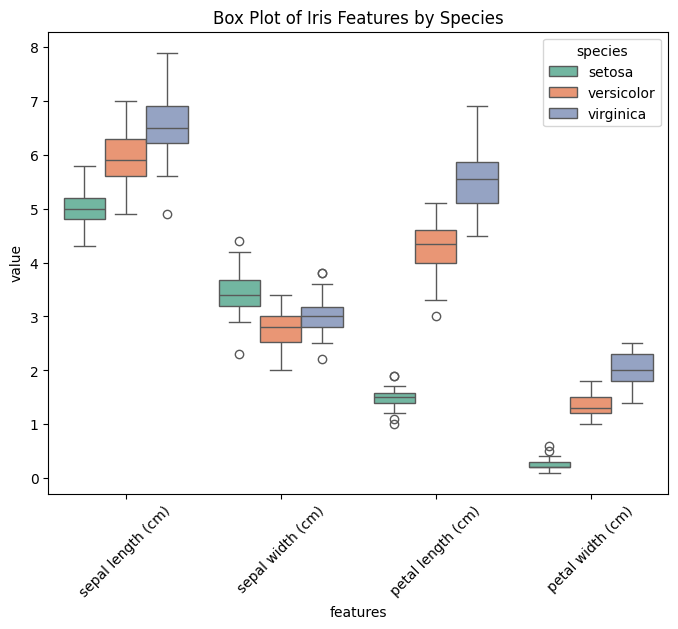

In [6]:
# Create a box plot for each feature
df_melted = df.melt(id_vars="species", var_name="features", value_name="value")
plt.figure(figsize=(8, 6))
sns.boxplot(x="features", y="value", hue="species", data=df_melted, palette="Set2")
plt.title("Box Plot of Iris Features by Species")
plt.xticks(rotation=45)
plt.show()


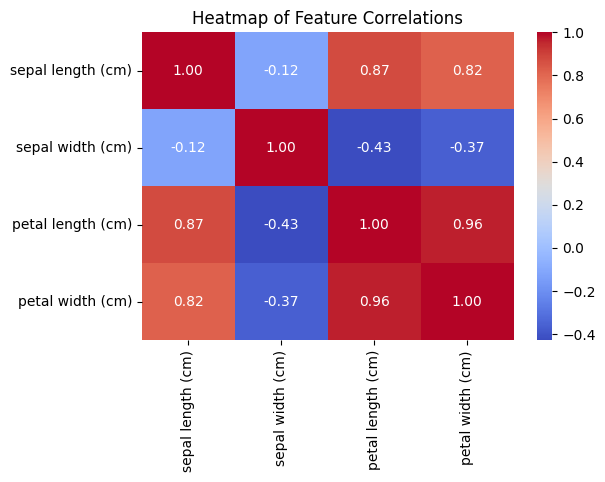

In [45]:
# Compute the correlation matrix
correlation_matrix = df.iloc[:, :-1].corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Heatmap of Feature Correlations")
plt.show()


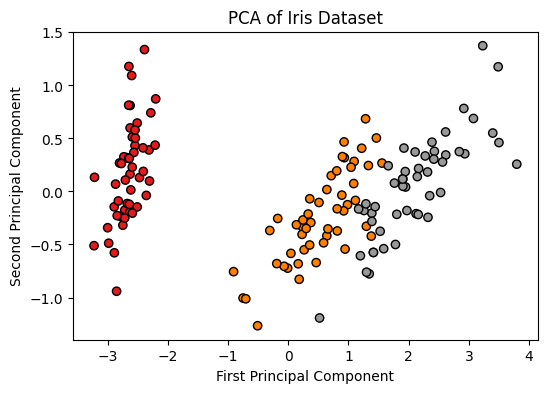

In [9]:
from sklearn.decomposition import PCA

# Perform PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(iris.data)

# Scatter plot of the first two principal components
plt.figure(figsize=(6, 4))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=iris.target, cmap='Set1', edgecolor='k')
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.title("PCA of Iris Dataset")
plt.show()


In [12]:
# Task 4

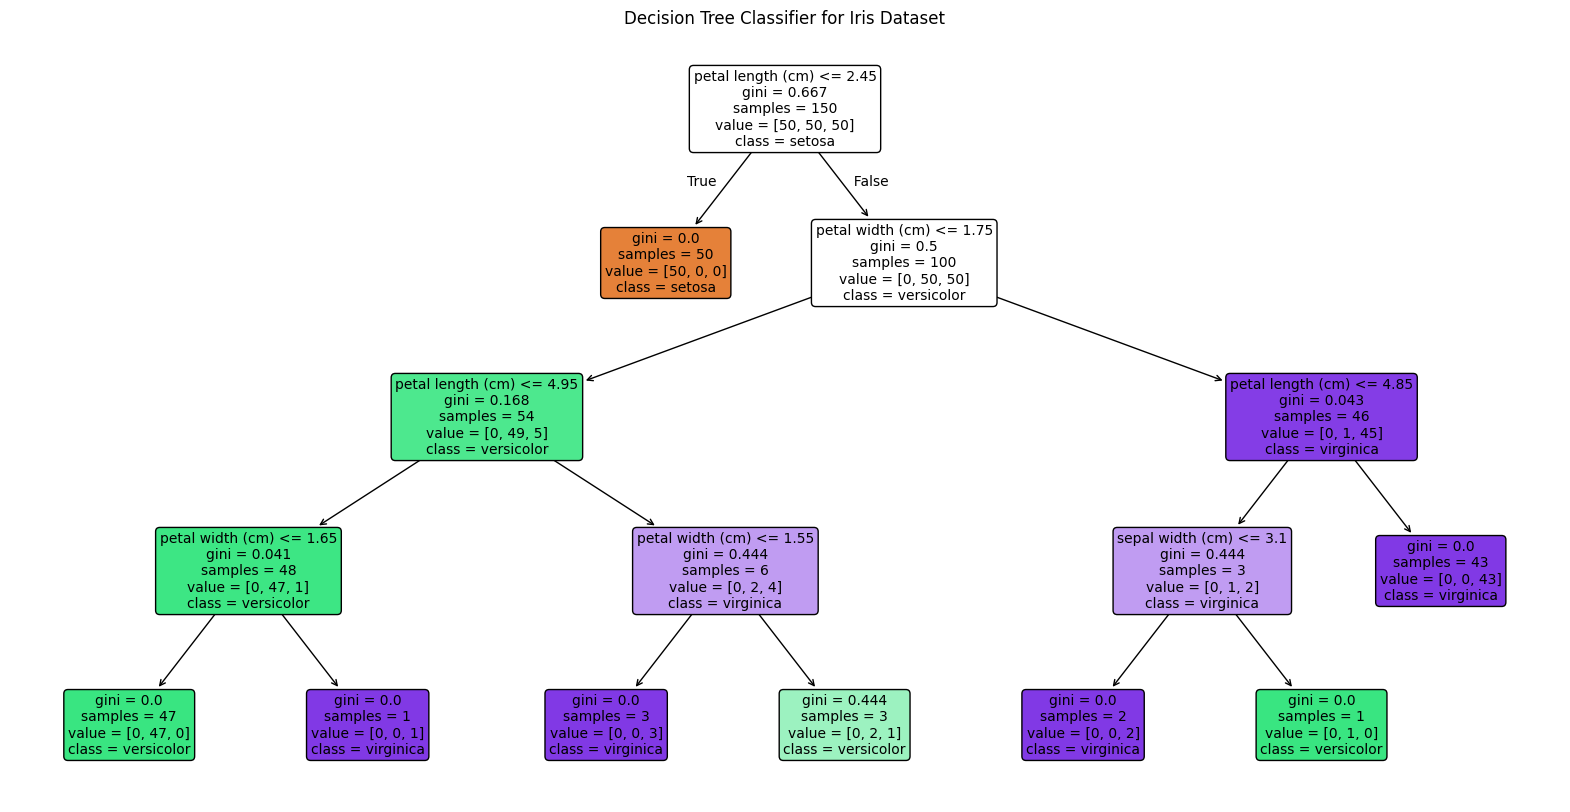

In [31]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Train the decision tree classifier
clf = DecisionTreeClassifier(max_depth=4, random_state=42)
clf.fit(X, y)

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(
    clf, 
    filled=True, 
    feature_names=iris.feature_names, 
    class_names=iris.target_names,
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree Classifier for Iris Dataset")
plt.show()


In [36]:
from sklearn.model_selection import KFold

# Define the K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)


In [33]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

accuracies = []
clf = DecisionTreeClassifier(random_state=42)

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

print(f'Mean Accuracy: {np.mean(accuracies):.2f}')


Mean Accuracy: 0.95


In [42]:
from sklearn.model_selection import GridSearchCV

# parameter grid for tuning
param_grid = {
    'max_depth': [3, 4, 5, None],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

# Initialize GridSearchCV
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=kf)
grid_search.fit(X, y)



GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, None],
                         'min_samples_split': [2, 5, 10]})

In [41]:
from sklearn.metrics import classification_report, confusion_matrix

# Predict using the best model
y_pred_best = best_model.predict(X_test)
print(confusion_matrix(y_test, y_pred_best))
print(classification_report(y_test, y_pred_best))


[[ 7  0  0]
 [ 0 11  0]
 [ 0  1 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.92      1.00      0.96        11
           2       1.00      0.92      0.96        12

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [ ]:
#Task 5

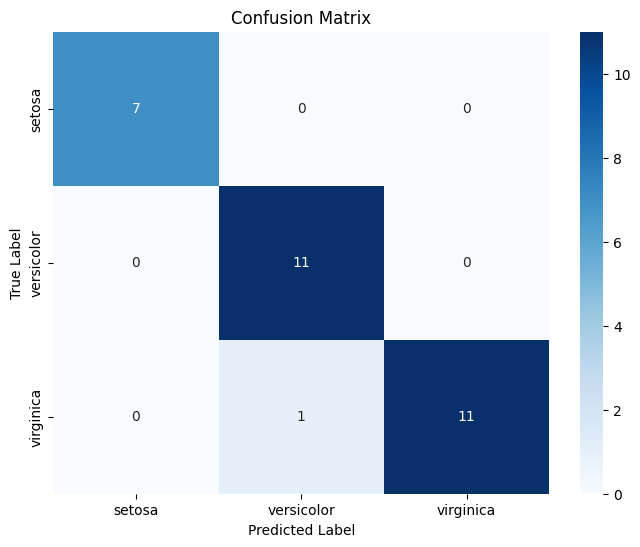

In [48]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assuming `y_test` is the actual target and `y_pred` is the predicted target
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


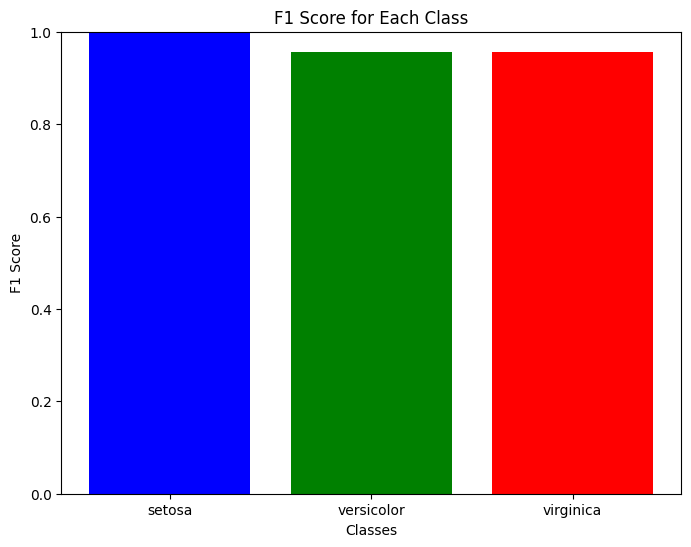

In [49]:
from sklearn.metrics import f1_score

# F1 score for each class
f1_scores = f1_score(y_test, y_pred, average=None)
classes = iris.target_names

plt.figure(figsize=(8, 6))
plt.bar(classes, f1_scores, color=['blue', 'green', 'red'])
plt.xlabel("Classes")
plt.ylabel("F1 Score")
plt.title("F1 Score for Each Class")
plt.ylim(0, 1)  # F1 Score range is between 0 and 1
plt.show()


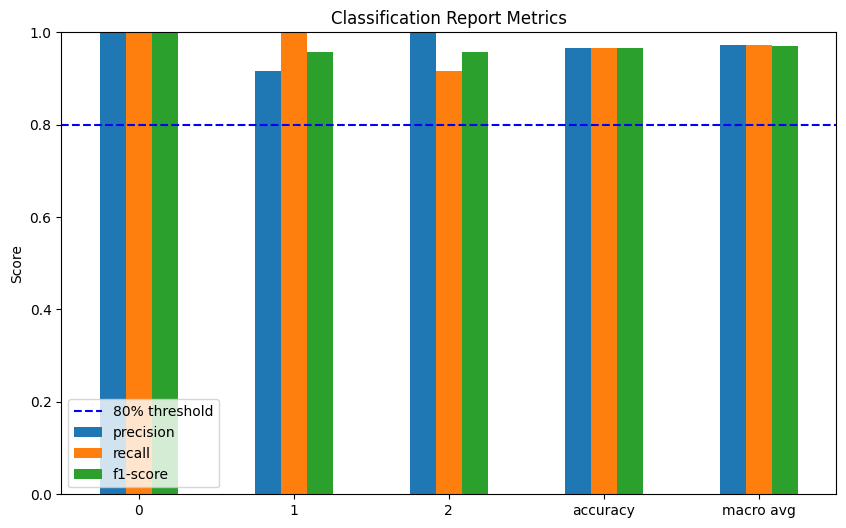

In [52]:
import pandas as pd

report_df = pd.DataFrame(report).transpose()

# Plotting precision, recall, and F1-score
report_df[['precision', 'recall', 'f1-score']].iloc[:-1].plot(kind='bar', figsize=(10, 6))
plt.title('Classification Report Metrics')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.ylim(0, 1)
plt.axhline(0.8, color='b', linestyle='--', label='80% threshold')
plt.legend()
plt.show()


In [54]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler ()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

print(X_train.shape)
print(X_test.shape)

(120, 4)
(30, 4)


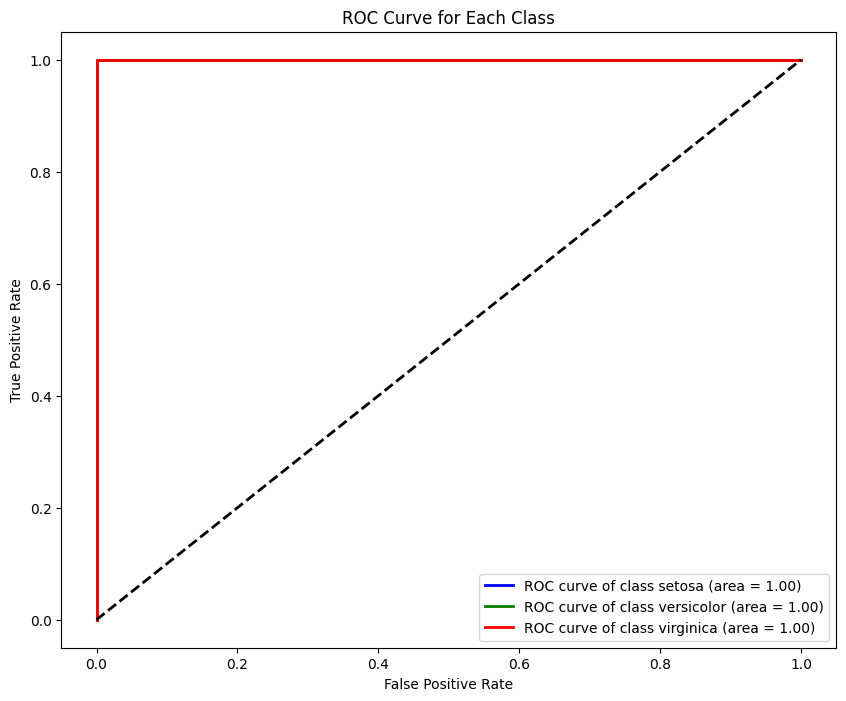

In [4]:
mport train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris


iris = load_iris()
X = iris.data
y = iris.target

#  training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# output for multi-class
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
y_train_bin = label_binarize(y_train, classes=[0, 1, 2])

#  Decision Tree model using One-vs-Rest classifier
classifier = OneVsRestClassifier(DecisionTreeClassifier()).fit(X_train, y_train_bin)
y_score = classifier.predict_proba(X_test)

#  ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(iris.target_names)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# ROC curve for each class
plt.figure(figsize=(10, 8))
for i, color in zip(range(len(iris.target_names)), ['blue', 'green', 'red']):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve of class {iris.target_names[i]} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Each Class')
plt.legend(loc="lower right")
plt.show()


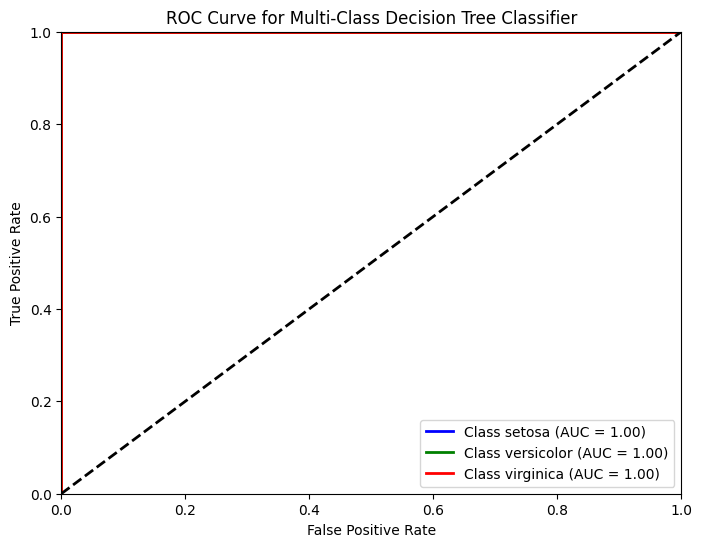

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize
from sklearn.datasets import load_iris

# Load the dataset
iris = load_iris()
X, y = iris.data, iris.target

# Binarize the output for multi-class classification
y_bin = label_binarize(y, classes=[0, 1, 2])
n_classes = y_bin.shape[1]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y_bin, test_size=0.3, random_state=42)

# Train a Decision Tree classifier with One-vs-Rest approach
classifier = OneVsRestClassifier(DecisionTreeClassifier(max_depth=3, random_state=42))
classifier.fit(X_train, y_train)
y_score = classifier.predict_proba(X_test)

# Plot the ROC curve for each class
plt.figure(figsize=(8, 6))
colors = ['blue', 'green', 'red']
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=colors[i], lw=2, label=f'Class {iris.target_names[i]} (AUC = {roc_auc:.2f})')

# Plot reference line
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Multi-Class Decision Tree Classifier")
plt.legend(loc="lower right")
plt.show()


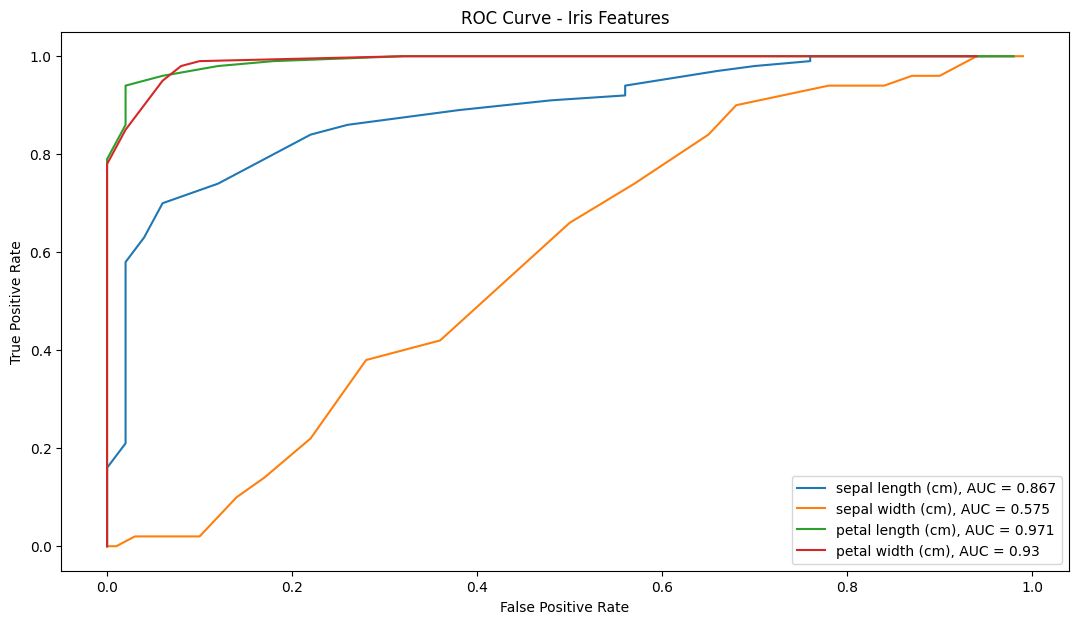

In [5]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn.metrics import auc
import numpy as np


data = load_iris()
X, y = data.data, data.target

# binary target variable for class 2 (Iris-Virginica)
y_ = y == 2

# plot
plt.figure(figsize=(13, 7))

# Loop over each feature in the dataset
for col in range(X.shape[1]):
    tpr, fpr = [], []
    
    #  TPR and FPR for different thresholds
    for threshold in np.linspace(min(X[:, col]), max(X[:, col]), 100):
        detP = X[:, col] < threshold
        tpr.append(sum(detP & y_) / sum(y_))  # TP/P, aka recall
        fpr.append(sum(detP & (~y_)) / sum(~y_))  # FP/N
        
    
    if auc(fpr, tpr) < 0.5:
        tpr, fpr = fpr, tpr
    
    #
    plt.plot(fpr, tpr, label=f"{data.feature_names[col]}, AUC = {np.round(auc(fpr, tpr), 3)}")


plt.title('ROC Curve - Iris Features')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


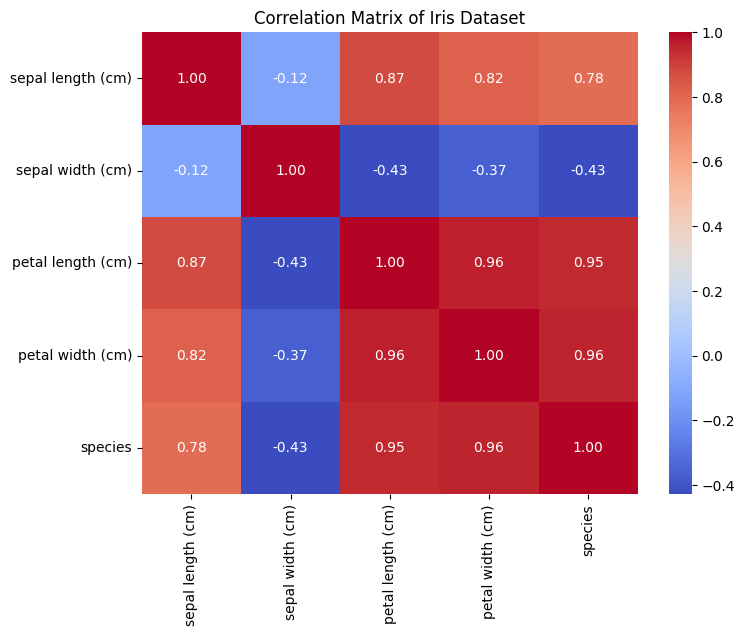

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
species,0.782561,-0.426658,0.949035,0.956547,1.000000


In [2]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target

# Calculate the correlation matrix
correlation_matrix = iris_df.corr()

# Plot the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Iris Dataset")
plt.show()

correlation_matrix
